The purpose of the example notebooks is to provide quick view to the power of the framework, and its purpose.
It is not documentation - documentation may be available in the future, if will be needed and requested.

In [1]:
from src.motion_models.trajectory_generation.route_generation import *
from src.visual.visual_tools import *

import numpy as np

%load_ext autoreload
%autoreload 2

### Constant-Velocity Model

MSE for k=1: 0.46907488205249886
MSE for k=5: 0.8152729318279803


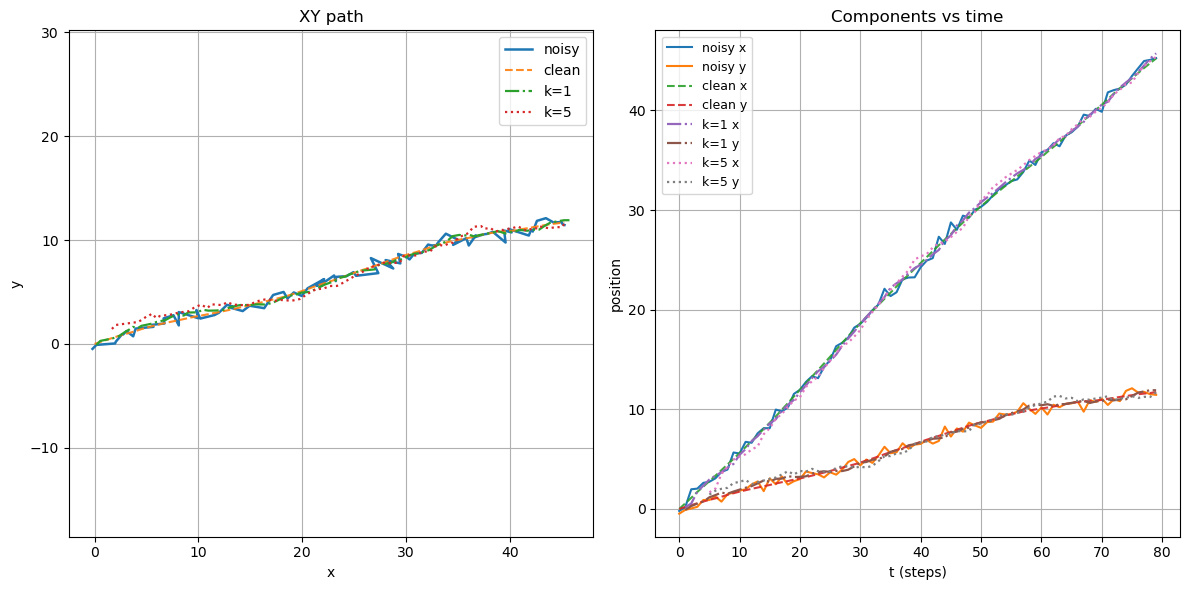

In [25]:
from src.filters.cv_kalman_filter import CVKalmanFilter, InitializationData

NOISE = np.array([0.4,0.4])
PROCESS_NOISE_STD = np.array([0.5,0.5])
dt=0.04
white_accel_density = 1e1
initial_velocity = np.array([14,5])
initial_position = np.array([0,0])
k_lag=5


initial_trajectory_state = TrajectoryState(position=initial_position, velocity=initial_velocity)
trajectories = generate_cv_trajectory(T=80, dt=dt, initial_state=initial_trajectory_state, number_of_trajectories=1, measurement_noise_std=NOISE, vel_change_std=PROCESS_NOISE_STD, seed=42)

test_traj = trajectories[0][0]
clean_test_traj = trajectories[0][1]


# Initialzing the KF
initial_matrices_data = InitializationData(observation_noise_std=NOISE, process_noise_std=PROCESS_NOISE_STD)

base_kf = CVKalmanFilter(2, 4, 2, dt, initial_matrices_data)
base_kf.initialize()

mse_k1, preds_k1= base_kf.evaluate_on_trajectory(
    test_traj,
    clean_test_traj,
    normalize_mse=False,
    return_predictions=True)

base_kf.initialize()
mse_k_lag, preds_k_lag= base_kf.evaluate_on_trajectory(
    test_traj,
    clean_test_traj,
    k=k_lag,
    normalize_mse=False,
    return_predictions=True)

print(f"MSE for k=1: {mse_k1}")
print(f"MSE for k={k_lag}: {mse_k_lag}")

plot_trajectories_with_predictions_shifted(test_traj, clean_test_traj, [(preds_k1, 1), (preds_k_lag, k_lag)])


### Constant-Acceleration Model

MSE for k=1: 0.1288019317840361
MSE for k=5: 0.37799536208121914


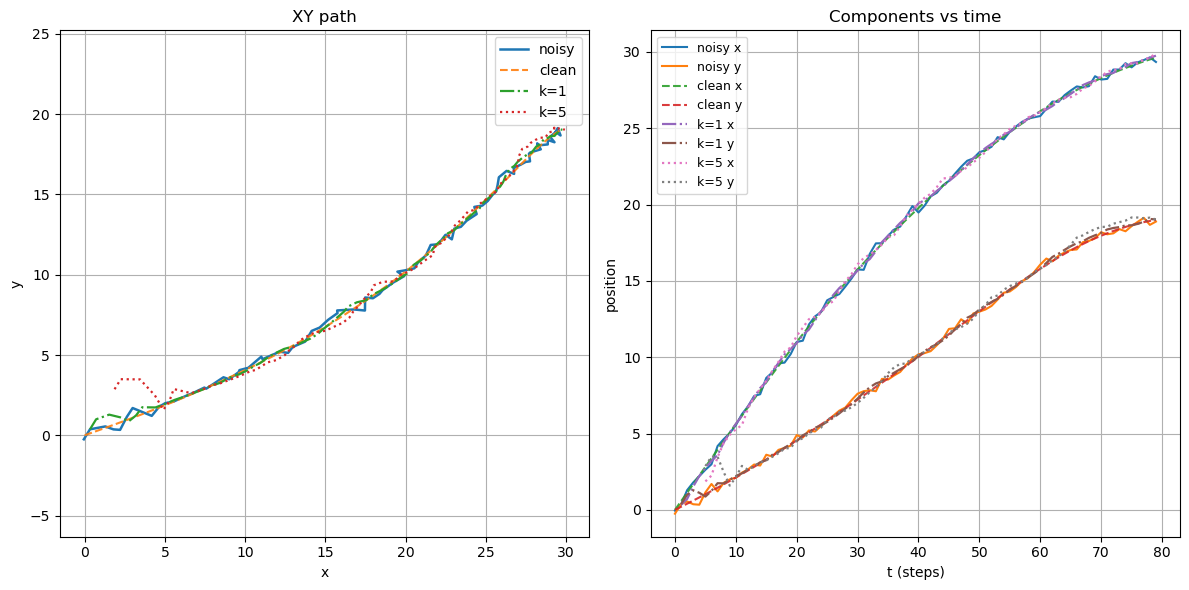

In [24]:
from src.filters.ca_kalman_filter import CAKalmanFilter, InitializationData

dt = 0.04
NOISE = np.array([0.2,0.2])
white_accel_density = 10
accel_noise_std = np.sqrt(dt * white_accel_density)
initial_acceleration = np.array([1, 1])
initial_velocity = np.array([14,5])
initial_position = np.array([0,0])

initial_trajectory_state = TrajectoryState(position=initial_position, velocity=initial_velocity, acceleration=initial_acceleration)
trajectories = generate_ca_trajectory(T=80, dt=dt,initial_state=initial_trajectory_state, measurement_noise_std=NOISE, number_of_trajectories=1, seed=43, accel_noise_std=accel_noise_std)

test_traj = trajectories[0][0]
clean_test_traj = trajectories[0][1]

initial_matrices_data = InitializationData(observation_noise_std=NOISE, white_accel_density=white_accel_density)
base_kf = CAKalmanFilter(2, 6, 2, dt, initial_matrices_data)
base_kf.initialize()

mse_k1, preds_k1= base_kf.evaluate_on_trajectory(
    test_traj,
    clean_test_traj,
    normalize_mse=False,
    return_predictions=True)

base_kf.initialize()
mse_k_lag, preds_k_lag= base_kf.evaluate_on_trajectory(
    test_traj,
    clean_test_traj,
    k=k_lag,
    normalize_mse=False,
    return_predictions=True)

print(f"MSE for k=1: {mse_k1}")
print(f"MSE for k={k_lag}: {mse_k_lag}")

plot_trajectories_with_predictions_shifted(test_traj, clean_test_traj, [(preds_k1, 1), (preds_k_lag, k_lag)])

### Coordinated Turn Model

MSE for k=1: 0.21355240796519098
MSE for k=5: 0.39133595626503637


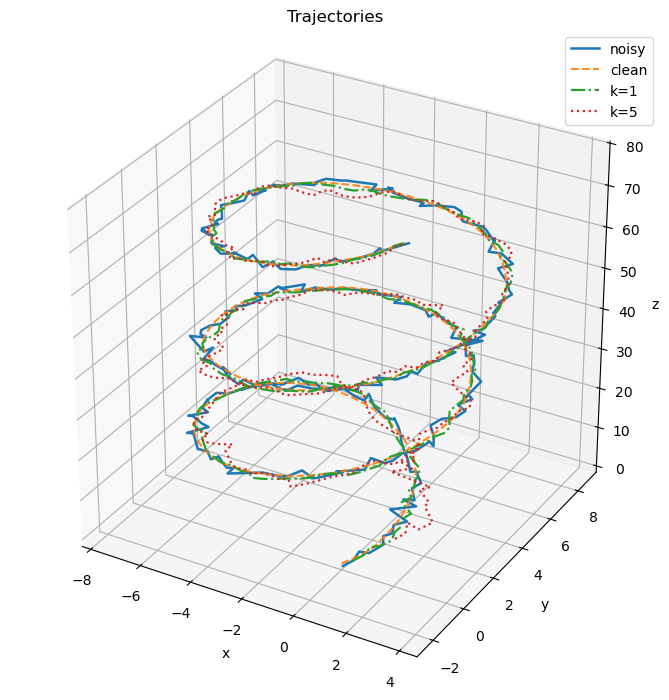

In [43]:
from src.filters.ct_kalman_filter import CTKalmanFilter
NOISE = np.array([0.2,0.2, 0.2])
ACCL_STD = 1e-1
OMEGA_STD = 1e0
omega = 2
pos_start = np.array([0,0,0])
v0 = np.array([5, 7, 8])
z_accel = 3.0
dt = 0.04

initial_generation_state = TrajectoryState(position=pos_start, velocity=v0, acceleration=np.array([0,0,z_accel]))
trajectories = generate_ct_trajectory_simple(T=250, dim=3, dt=dt, omega=omega, initial_state=initial_generation_state, measurement_noise_std=NOISE, omega_noise_std=OMEGA_STD, number_of_trajectories=10,seed=44)

test_traj = trajectories[1][0]
clean_test_traj = trajectories[1][1]


initial_matrices_data = InitializationData(observation_noise_std=NOISE, omega_std=OMEGA_STD, process_noise_std=np.array([0,0, ACCL_STD]))
base_kf = CTKalmanFilter(3, 10, 3, dt=dt, initialization_data=initial_matrices_data)
base_kf.initialize()

mse_k1, preds_k1 = base_kf.evaluate_on_trajectory(
    test_traj,
    clean_test_traj,
    normalize_mse=False,
    return_predictions=True)

base_kf.initialize()
mse_k_lag, preds_k_lag = base_kf.evaluate_on_trajectory(
    test_traj,
    clean_test_traj,
    k=k_lag,
    normalize_mse=False,
    return_predictions=True)

print(f"MSE for k=1: {mse_k1}")
print(f"MSE for k={k_lag}: {mse_k_lag}")

plot_trajectories_with_predictions_shifted(test_traj, clean_test_traj, [(preds_k1, 1), (preds_k_lag, k_lag)])
### Coordinated Turn Model

### Singer Model

MSE for k=1: 0.3531271153922865
MSE for k=5: 1.3714765226332306


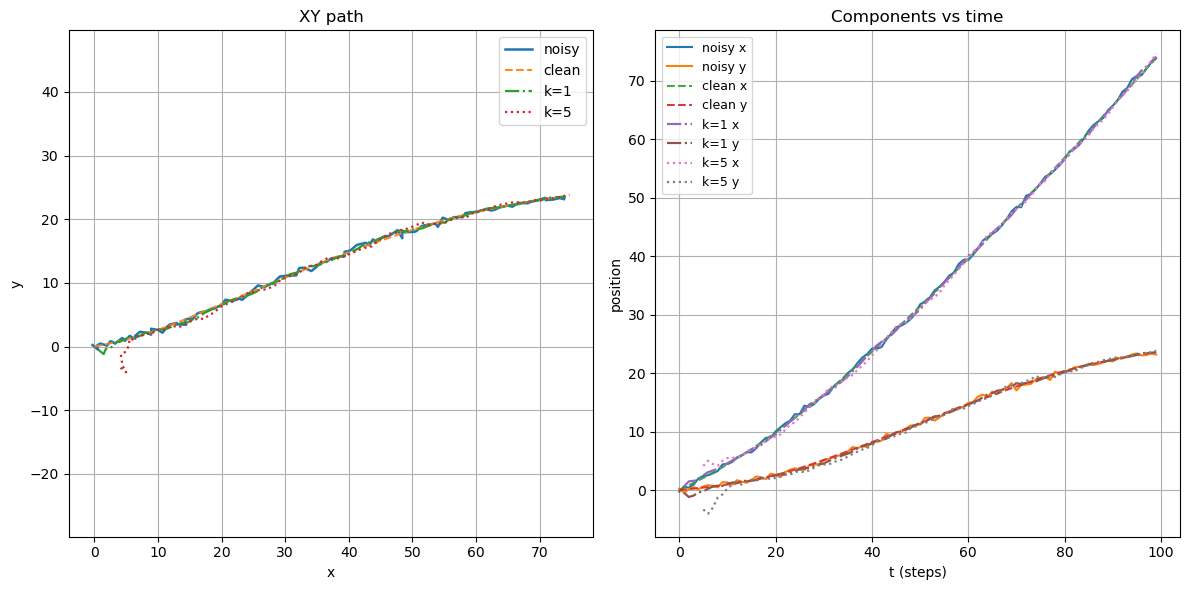

In [59]:
from src.filters.singer_model_kalman_filter import SingerKF, InitializationData

dt=0.04
tau = np.array([5, 5])
accel_std = np.array([4,4])
v0 = np.array([10, 2])
a0 = np.array([4, 2])
pos_start = np.array([0,0])
NOISE = np.array([0.3, 0.3])

initial_generation_state = TrajectoryState(position=pos_start, velocity=v0, acceleration=a0)
trajectories = generate_singer_trajectory(
    T=100,
    dt=dt,
    initial_state=initial_generation_state,
    tau=tau,
    dim=2,
    sigma_a=accel_std,
    noise_std=NOISE,
    number_of_trajectories=10,
    seed=18)

traj_noisy = trajectories[0][0]
traj_clean = trajectories[0][1]

init = InitializationData(
    observation_noise_std=NOISE,    # e.g., meters
    process_noise_std=accel_std) # sigma_a per axis (m/s^2)
base_kf = SingerKF(dim=2, dt=dt, tau=tau, initialization_data=init)  # tau in seconds (maneuver correlation time)
base_kf.initialize()
mse_k1, preds_k1 = base_kf.evaluate_on_trajectory(
    traj_noisy,
    traj_clean,
    normalize_mse=False,
    return_predictions=True)

base_kf.initialize()
mse_k_lag, preds_k_lag = base_kf.evaluate_on_trajectory(
    traj_noisy,
    traj_clean,
    k=k_lag,
    normalize_mse=False,
    return_predictions=True)

print(f"MSE for k=1: {mse_k1}")
print(f"MSE for k={k_lag}: {mse_k_lag}")

plot_trajectories_with_predictions_shifted(traj_noisy, traj_clean, [(preds_k1, 1), (preds_k_lag, k_lag)])
